In [1]:
from torchvision import datasets

In [2]:
data_path = '../data/'
cifar10 = datasets.CIFAR10(data_path,train=True,download=True)
cifar10_val = datasets.CIFAR10(data_path,train=False,download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data/
    Split: Train

In [4]:
# 데이터 셋에는 __getitem__메소드가 구현되어 있음
# __len __ 구현되어 있어서 len()함수 사용
len(cifar10)

50000

In [5]:
img, label = cifar10[99]

In [6]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [7]:
class_name = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

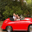

In [8]:
img

In [9]:
label, class_name[label]

(1, 'automobile')

In [10]:
# 이미지를 파이토치 텐서로 변환
from torchvision import transforms
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [11]:
# transforms.ToTensor  넘파이 배열, PIL이미지를 텐서로 바꾸는역활, C x H x W로 맞춰준다

In [12]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [13]:
tensor_cifar10 = datasets.CIFAR10(data_path,train=True,download=False, transform=transforms.ToTensor())

In [14]:
img_t, label = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [15]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [16]:
# toTensor()는 이미지를 텐서로 변경하면서 데이터를 scaled 한다.. 0.0 ~ 1.0
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

In [17]:
# 동일한 이미지 인지 확인한다
import matplotlib.pylab as plt

In [18]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
# KMP_DUPLICATE_LIB_OK=TRUE

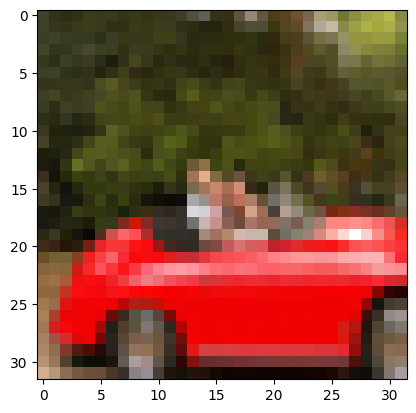

In [26]:
import numpy as np
new_img =  np.array(img_t).transpose(1,2,0)
plt.imshow(new_img)

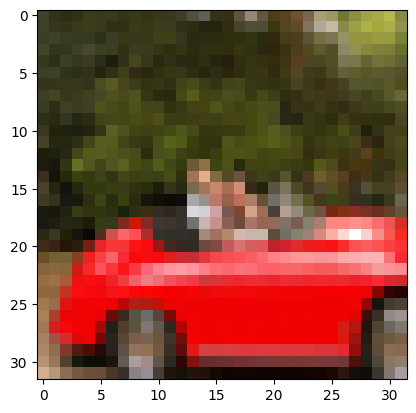

In [28]:
plt.imshow(img_t.permute(1,2,0))

In [29]:
# 데이터 정규화
# 변환작업을  transeforms.Compose로 여러 변환을 엮어서 사용

In [32]:
import torch

In [33]:
imgs = torch.stack( [img_t for img_t, label in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [36]:
# 채널별로 평균
imgs.view(3,-1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [37]:
# 채널별로 표준편차
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [38]:
# 정규화   = (요소 - 평균) / 표준편차

In [39]:
transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [40]:
# 이미지 데이터를 토치로 변경, 정규화
transformed_cifar10 = datasets.CIFAR10(data_path,train=True,download=False
                                       , transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))
                                       ])                                       
                                      )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


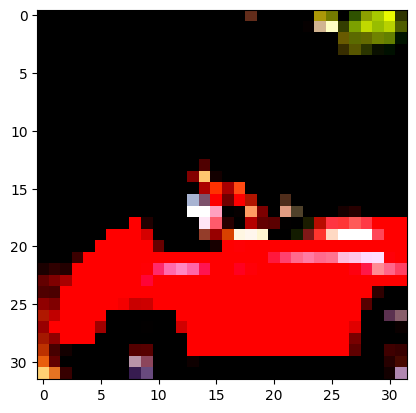

In [42]:
img_t, label =  transformed_cifar10[99]
plt.imshow(img_t.permute(1,2,0))